In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Hello World!")

Hello World!


Logistic Regression : load breast cancer dataset, split the data in train and test set (20%) and apply the LogisticRegression classifier, then show the confusion matrix 

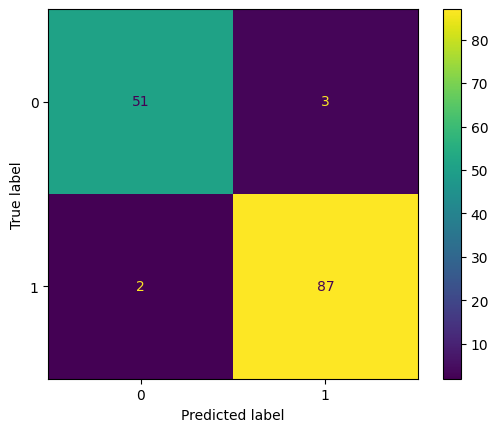

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Split the digits dataset into training and testing sets (30% of data for test), train a Support Vector Machine (SVM) classifier, report the accuracy on the test set, and visualize the confusion matrix.

0.987037037037037


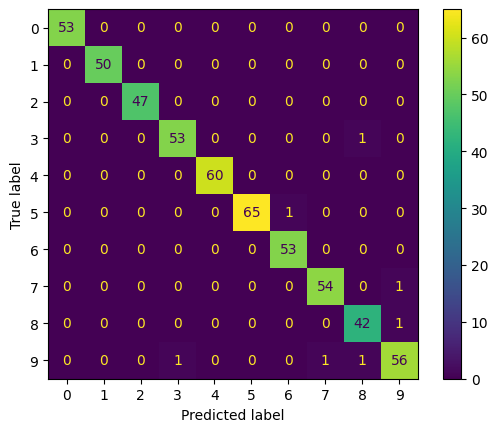

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_digits()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=7/10, random_state=42)
model = SVC(probability=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Handle missing data in the following DataFrame by filling missing values with the mean of the column? visualize the number of missing values before and after the operation using Matplotlib. df = pd.DataFrame({ 'A': [1, 2, np.nan, 4, 5], 'B': [np.nan, 2, 3, 4, np.nan], 'C': [1, np.nan, np.nan, 4, 5] })

[]

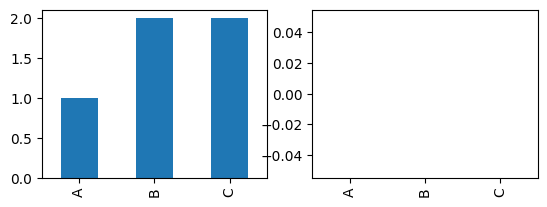

In [23]:
df = pd.DataFrame({ 'A': [1, 2, np.nan, 4, 5], 'B': [np.nan, 2, 3, 4, np.nan], 'C': [1, np.nan, np.nan, 4, 5] })
counter = 220

def get_nulls(df):
    return df.isnull().sum()

def plot_them(df):
    global counter
    counter += 1
    plt.subplot(counter)
    get_nulls(df).plot(kind='bar')

plot_them(df)
new_df = df.apply(lambda col: col.fillna(col.mean()))
plot_them(new_df)
plt.plot()


Perform K-means (k=3) clustering on the Iris dataset and visualize the clusters using Matplotlib.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


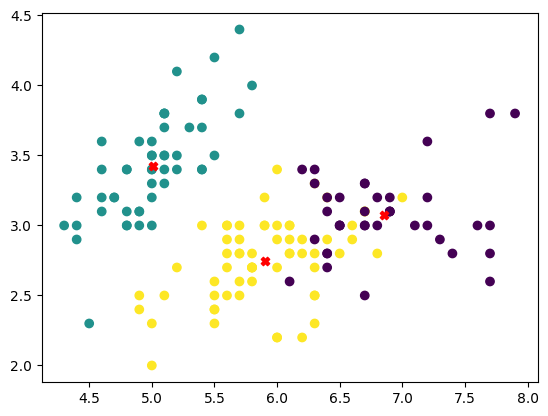

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

data = load_iris()
x = data.data

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(x)

print(data.feature_names)
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='Red', marker='X')

plt.show()

Perform a Grid Search for hyperparameter tuning of a Support Vector Machine (SVM) classifier on the Iris dataset (with 5 fold CV) param_grid = { 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'] }

In [9]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

data = load_iris()
x = data.data
y = data.target

model = SVC(probability=True)

param_grid = { 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'] }

gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
gs.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

Implement a Decision Tree classifier on the Iris dataset and visualize the decision tree

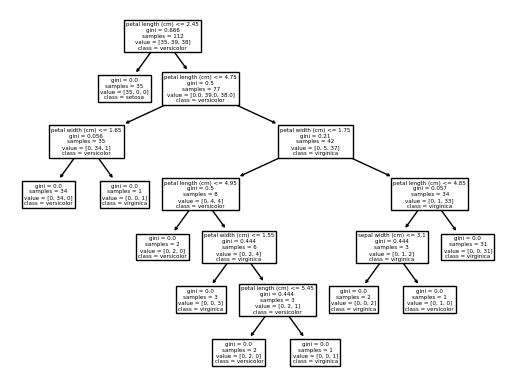

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

data = load_iris()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

Apply k-means clustering (k=3) to the Wine dataset. What are the coordinates of the cluster centers?

In [9]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

data = load_wine()
x = data.data

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)

print(kmeans.cluster_centers_)

[[1.25985294e+01 2.45343137e+00 2.32186275e+00 2.06460784e+01
  9.36960784e+01 2.05362745e+00 1.64754902e+00 3.95980392e-01
  1.42509804e+00 4.67333332e+00 9.17843137e-01 2.39480392e+00
  5.21558824e+02]
 [1.33691837e+01 2.40000000e+00 2.39265306e+00 1.85142857e+01
  1.09081633e+02 2.44163265e+00 2.21367347e+00 3.25510204e-01
  1.70673469e+00 5.18836735e+00 9.59714286e-01 2.84795918e+00
  9.06346939e+02]
 [1.38507407e+01 1.77851852e+00 2.48777778e+00 1.69259259e+01
  1.05629630e+02 2.94148148e+00 3.13666667e+00 2.98888889e-01
  2.00703704e+00 6.27518519e+00 1.10296296e+00 3.00222222e+00
  1.30877778e+03]]


 implement cross-validation (5 folds) to evaluate the performance of a Randomforest using Scikit-learn? Plot the ROC curve for each fold.

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the iris dataset
data = load_iris()
x = data.data
y = data.target

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up cross-validation


# Perform cross-validation


# Plot the mean ROC curve for each class



APPUNTI ALTRI NOTEBOOK

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_predict

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# setup training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42 )

# train RandomForest
rf = RandomForestClassifier()

# stratified splitting of the training samples
skfolds = StratifiedKFold(n_splits=5)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(rf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

    y_scores = cross_val_predict(clone_clf, X_train, y_train, cv=3, method="decision_function")

    plt.figure(figsize=(8, 6))
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    plot_roc_curve(fpr, tpr)
    
plt.show()

Train a Random Forest classifier on the Wine dataset and evaluate its performance using cross-validation. What is the mean accuracy of the classifier?

In [14]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = load_wine()
x = data.data
y = data.target

rf = RandomForestClassifier()
score = cross_val_score(rf, x, y)
print(score)
print(np.mean(score))

[0.97222222 0.94444444 0.97222222 0.97142857 0.97142857]
0.9663492063492063


Train a k-Nearest Neighbors (k-NN) classifier on the Digits dataset, perform a grid search to find the best value for k, and report the best score. consider test size to 30% and use CV=5, for cross validation.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_digits

data = load_digits()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=3/10, random_state=42)

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, {'n_neighbors': np.arange(5, 21)}, cv=5)

gs.fit(x_train, y_train)

print(f"Score = {gs.best_score_}, k = {gs.best_params_['n_neighbors']}")

Score = 0.9785239992411308, k = 5
